<a href="https://colab.research.google.com/github/Brandon-Bernal-Alarcon/Notas/blob/main/Machine%20Learning/Aprendizaje%20Supervisado/08_Regresi%C3%B3n_log%C3%ADstica_(clasificaci%C3%B3n_binaria).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresión logística: clasificación binaria


La regresión logística es un modelo de aprendizaje supervisado utilizado para clasificación, principalmente binaria. Aunque su nombre incluye “regresión”, su objetivo no es predecir valores continuos, sino asignar observaciones a una clase.

En este módulo, la regresión logística se usa para resolver problemas donde la variable objetivo toma valores:

$$y \in \{0.1\}$$


Ejemplos comunes: ¿Es una manzana o no? ¿El tumor es maligno o benigno?

**Modelo matemático y función sigmoide**

La regresión logística parte de una combinación lineal de las variables de entrada:

$$z=w^Tx+b$$

Donde $w = (w_1,w_2, ... , w_n)$ y $x = (x_1, x_2,...,x_n)$

A diferencia de la regresión lineal, este valor no se usa directamente.
Se aplica la función logística (sigmoide):
$$\sigma(z)=\frac{1}{1+e^{-z}}$$

Esta función convierte cualquier número real en un valor entre 0 y 1, permite interpretar la salida como una probabilidad

**Interpretación probabilística**

La salida del modelo:
$$\hat{y}=\sigma(w^Tx+b)$$

se interpreta como:

$$P[y=1|x]$$

Es decir, la probabilidad de que una observación pertenezca a la clase positiva dado su vector de características.

La regla de decisión típica es:

Si $\hat{y} ≥0.5$ → clase positiva

Si $\hat{y} < 0.5$ → clase negativa

**Clasificación binaria en el dataset de frutas**

En el dataset de frutas, el problema original es multiclase.
Para aplicar regresión logística, se transforma en un problema binario:

Clase positiva: manzana

Clase negativa: todas las demás frutas

Solo se utilizan dos características: height y width

Esto permite visualizar fácilmente el límite de decisión.

In [4]:
#@title Grafico
from sklearn.linear_model import Ridge

from sklearn.linear_model import LinearRegression
%matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import neighbors
import numpy
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = numpy.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = numpy.meshgrid(numpy.arange(x_min-k, x_max+k, h), numpy.arange(y_min-k, y_max+k, h))

    P = clf.predict(numpy.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


In [5]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Load the fruit data
fruits = pd.read_table('/content/fruit_data_with_colors.txt')

# Prepare the X and y for the binary classification problem (using only height and width)
X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else
X_train, X_test, y_train, y_test = (train_test_split(X_fruits_2d.values,y_fruits_apple.values,random_state = 0))

clf = LogisticRegression(C=100).fit(X_train, y_train)

**Límite de decisión en regresión logística**

Con dos características, la regresión logística aprende un límite de decisión lineal. Este límite corresponde a los puntos donde la probabilidad predicha es 0.5.

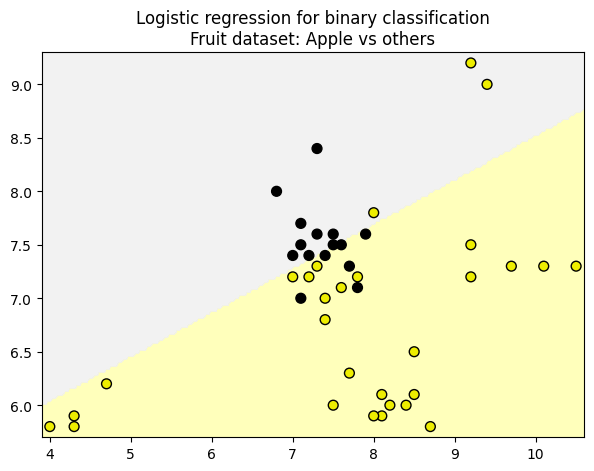

In [6]:
fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)

Cada región corresponde a una clase. La frontera entre regiones es una línea recta. El modelo separa manzanas del resto basándose en altura y ancho

**Predicción de nuevas observaciones y Evaluación del modelo: accuracy**

Una vez entrenado, el modelo puede predecir si una fruta nueva es una manzana o no y la precisión (accuracy) mide la proporción de observaciones correctamente clasificadas.

El modelo para la predicción calcula la probabilidad, aplica el umbral de decisión y devuelve la clase más probable y para la evaluación muestra precisión alta en entrenamiento y prueba indica buena generalización, piferencias grandes entre ambos pueden indicar sobreajuste o subajuste

In [7]:
h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][int(clf.predict([[h,w]])[0])]))

h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][int(clf.predict([[h,w]])[0])]))
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

A fruit with height 6 and width 8 is predicted to be: an apple
A fruit with height 10 and width 7 is predicted to be: not an apple
Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.73


**Regresión logística en un dataset sintético**

Para entender mejor el comportamiento del modelo, se aplica regresión logística a un conjunto de datos artificial.

El límite de decisión es lineal. El modelo separa las clases de forma global. Es comparable a un clasificador lineal como SVM

Accuracy of Logistic regression classifier on training set: 0.81
Accuracy of Logistic regression classifier on test set: 0.84


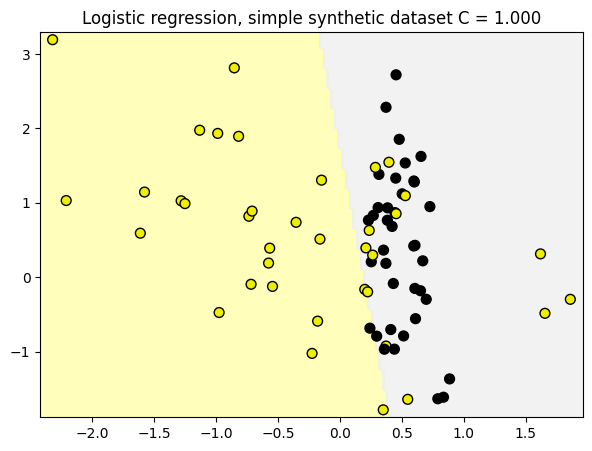

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
clf = LogisticRegression().fit(X_train, y_train)
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                         None, None, title, subaxes)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


**Regularización en regresión logística: parámetro C**

La regresión logística incluye regularización L2 por defecto, el parámetro C controla su intensidad:

C pequeño → regularización fuerte

C grande → regularización débil

Relación conceptual:

$$Regularización ∝ \frac{1}{C}$$

**Efecto del parámetro C en el dataset de frutas**

Se entrena el modelo con distintos valores de C para observar cómo cambia el límite de decisión.

- C pequeño: frontera más simple y estable

- C grande: frontera más ajustada a los datos

- Valores grandes de C pueden llevar a sobreajuste

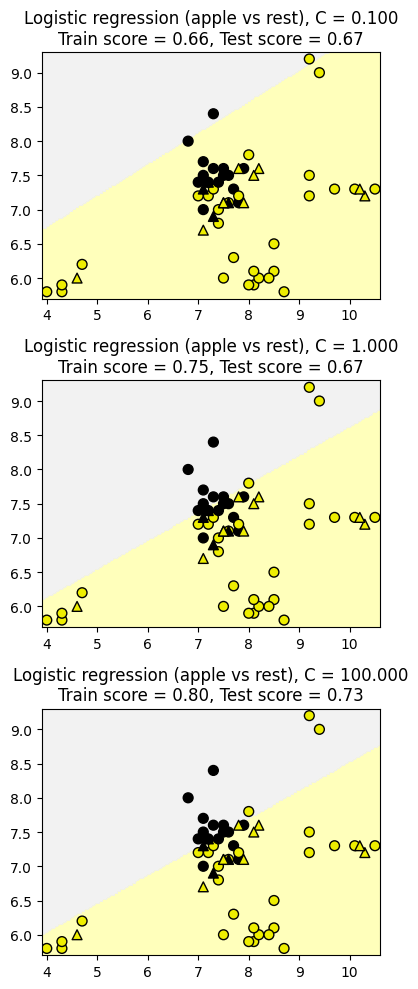

In [11]:
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.values,
                y_fruits_apple.values,
                random_state=0))

fig, subaxes = plt.subplots(3, 1, figsize=(4, 10))

for this_C, subplot in zip([0.1, 1, 100], subaxes):
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C)

    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
plt.tight_layout()

**Aplicación a un dataset real: cáncer de mama**

Finalmente, se aplica regresión logística a un dataset real con múltiples características.

In [15]:
# Breast cancer dataset for classification
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [16]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.95


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Resultados**

- Alta precisión en entrenamiento y prueba

- El modelo generaliza bien

- La regresión logística es adecuada para problemas reales de clasificación binaria